# **Import Libraries**

Pada tahap ini dilakukan import seluruh library yang dibutuhkan untuk eksplorasi data, visualisasi, pemodelan, hingga evaluasi model. Beberapa library penting antara lain `pandas` untuk manipulasi data, `matplotlib` dan `seaborn` untuk visualisasi, serta `sklearn` untuk modeling.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Atur style visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# **Data Loading**

Dataset yang digunakan merupakan data performa siswa yang bersumber dari Kaggle. Dataset dimuat ke dalam dataframe menggunakan `pandas.read_csv()`.

`df.head()` digunakan untuk melihat struktur awal data, termasuk fitur-fitur yang tersedia serta bentuk nilai pada setiap kolom.


In [3]:
df = pd.read_csv('/content/StudentsPerformance.csv')

# Tampilkan 5 baris awal
print("Preview Data:")
display(df.head())

Preview Data:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Data Understanding**

Pada tahap ini, dilakukan proses pemahaman awal terhadap dataset yang digunakan. Tujuan utamanya adalah untuk memperoleh gambaran umum mengenai struktur data, tipe data, jumlah nilai kosong (missing values), dan karakteristik statistik dasar. Tahapan ini sangat penting sebelum melanjutkan ke proses pembersihan dan eksplorasi data lebih lanjut.

---

### 🔹 Ukuran Dataset
Kode:
```python
print(df.shape)
```
Menampilkan ukuran dataset dalam format `(jumlah baris, jumlah kolom)`. Informasi ini berguna untuk mengetahui seberapa besar cakupan data yang akan dianalisis.

---

### 🔹 Informasi Tipe Data
Kode:
```python
print(df.info())
```
Menampilkan tipe data dari setiap kolom serta jumlah data non-null. Ini membantu mengidentifikasi apakah kolom bertipe numerik, kategorikal, atau object (teks), dan apakah terdapat kemungkinan konversi tipe data yang perlu dilakukan.

---

### 🔹 Statistik Deskriptif
Kode:
```python
display(df.describe())
```
Menampilkan ringkasan statistik deskriptif untuk kolom numerik, seperti nilai minimum, maksimum, rata-rata (mean), standar deviasi, dan kuartil. Dari sini bisa diketahui distribusi awal data dan potensi keberadaan outlier.

---

### 🔹 Cek Missing Values
Kode:
```python
print(df.isnull().sum())
```
Digunakan untuk menghitung jumlah nilai kosong (missing values) di setiap kolom. Jika terdapat nilai kosong, perlu dipertimbangkan metode penanganan seperti:
- Mengisi nilai kosong (imputasi) dengan mean/median/modus
- Menghapus baris atau kolom yang memiliki terlalu banyak missing value

---

### 🔹 Nilai Unik per Kolom
Kode:
```python
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")
```
Menghitung jumlah nilai unik pada setiap kolom. Ini berguna untuk:
- Mengidentifikasi apakah kolom merupakan data kategorikal
- Mengenali kolom dengan nilai konstan atau terlalu bervariasi (misalnya identifier)

---

### ✨ Insight Awal:
- Dataset memiliki struktur dan ukuran tertentu yang bisa mempengaruhi pendekatan analisis selanjutnya.
- Terdapat kolom-kolom dengan nilai kosong yang perlu ditangani agar tidak mengganggu kualitas analisis.
- Statistik deskriptif membantu memahami karakteristik dasar data numerik, seperti kecenderungan distribusi dan pencilan (outlier).
- Jumlah nilai unik per kolom membantu klasifikasi awal tipe data (numerik vs kategorikal) dan fitur mana yang relevan untuk model nantinya.

Tahap ini sangat penting sebagai dasar sebelum masuk ke proses *Data Cleaning* dan *Exploratory Data Analysis (EDA)*.

In [4]:
print("\nUkuran Dataset:")
print(df.shape)

print("\nInformasi Tipe Data:")
print(df.info())

print("\nStatistik Deskriptif:")
display(df.describe())

print("\nCek Missing Values:")
print(df.isnull().sum())

print("\nNilai Unik per Kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Ukuran Dataset:
(1000, 8)

Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Statistik Deskriptif:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Cek Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Nilai Unik per Kolom:
gender: 2
race/ethnicity: 5
parental level of education: 6
lunch: 2
test preparation course: 2
math score: 81
reading score: 72
writing score: 77


# **Exploratory Data Analysis (EDA)**

Pada tahap ini, dilakukan eksplorasi awal terhadap dataset untuk memahami distribusi data, hubungan antar fitur, serta potensi pola-pola yang dapat bermanfaat dalam tahap pemodelan.

### 1. Distribusi Fitur Numerik
Distribusi tiga fitur numerik utama, yaitu **math score**, **reading score**, dan **writing score**, divisualisasikan dalam bentuk histogram dengan KDE (Kernel Density Estimation). Visualisasi ini membantu melihat sebaran nilai dari masing-masing skor.

**Insight:**
- Sebagian besar nilai berada pada rentang menengah hingga tinggi.
- Terdapat kecenderungan distribusi mendekati normal, meskipun tidak sepenuhnya simetris.

### 2. Korelasi Antar Skor Akademik
Dilakukan analisis korelasi antar ketiga fitur numerik tersebut dengan menggunakan **heatmap**. Korelasi ini memberikan gambaran apakah skor satu mata pelajaran berkaitan dengan skor lainnya.

**Insight:**
- Terdapat korelasi positif yang cukup kuat antar ketiga skor.
- Ini mengindikasikan bahwa siswa yang memiliki nilai tinggi di satu bidang cenderung memiliki nilai tinggi di bidang lainnya juga.

### 3. Penambahan Fitur `average_score`
Untuk mempermudah analisis dan visualisasi, ditambahkan fitur baru bernama `average_score` yang merupakan rata-rata dari ketiga skor akademik. Fitur ini digunakan dalam beberapa visualisasi berikutnya untuk melihat tren secara keseluruhan.

### 4. Rata-rata Skor Berdasarkan Fitur Kategorikal
Dianalisis perbandingan skor rata-rata berdasarkan kategori:
- Gender
- Race/Ethnicity
- Parental Level of Education
- Lunch
- Test Preparation Course

Visualisasi menggunakan boxplot untuk melihat distribusi dan perbedaan skor rata-rata antar kategori.

**Insight:**
- Siswa yang mengikuti program persiapan ujian umumnya memiliki nilai rata-rata lebih tinggi.
- Terdapat variasi skor berdasarkan kategori lainnya seperti jenis kelamin dan tingkat pendidikan orang tua.

### 5. Distribusi Data Kategorikal
Untuk fitur kategorikal, dilakukan visualisasi menggunakan countplot untuk melihat jumlah siswa dalam setiap kategori.

**Insight:**
- Distribusi kategori relatif seimbang, meskipun beberapa kategori seperti jenis ras atau tingkat pendidikan orang tua menunjukkan perbedaan jumlah yang cukup signifikan.

---

Analisis ini memberikan gambaran umum tentang struktur data serta membantu dalam pengambilan keputusan pada tahap preprocessing dan pemodelan berikutnya.

In [5]:
# Fitur numerik dan kategorikal
num_features = ['math score', 'reading score', 'writing score']
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

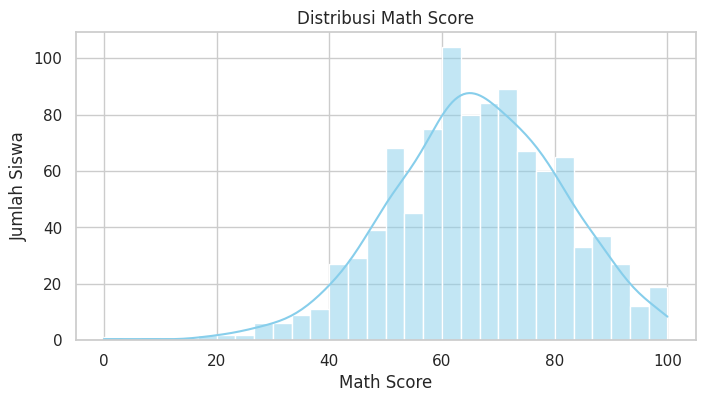

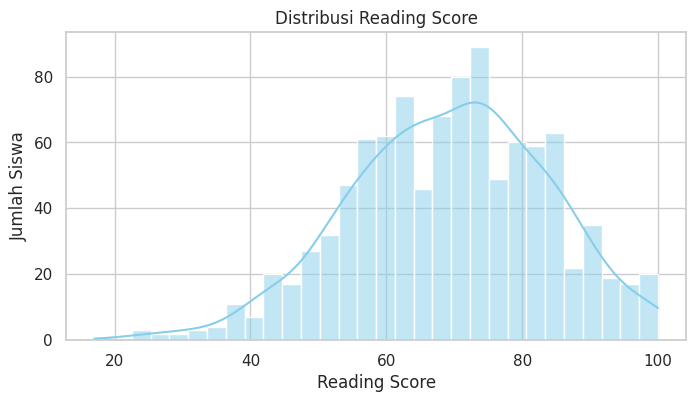

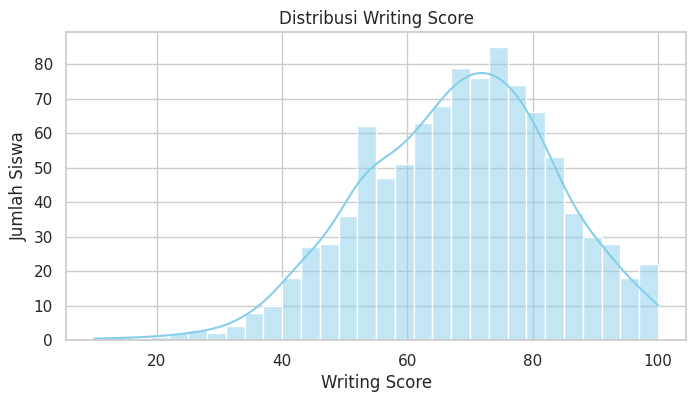

In [6]:
# Distribusi Skor Numerik
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {feature.title()}')
    plt.xlabel(feature.title())
    plt.ylabel('Jumlah Siswa')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


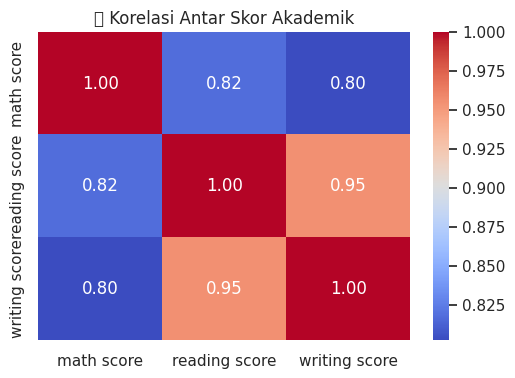

In [7]:
# Korelasi Antar Skor
plt.figure(figsize=(6, 4))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Korelasi Antar Skor Akademik")
plt.show()

# Tambahkan kolom rata-rata skor untuk analisis lanjutan
df['average_score'] = df[num_features].mean(axis=1)

<ipython-input-8-b92172695593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='average_score', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


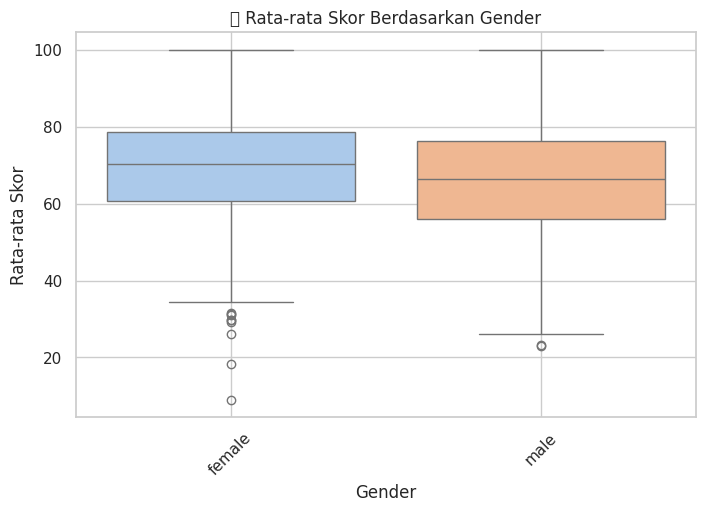

<ipython-input-8-b92172695593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='average_score', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


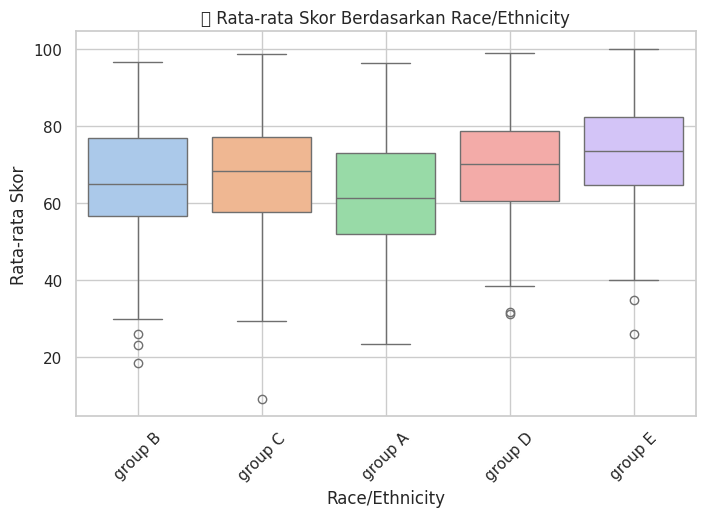

<ipython-input-8-b92172695593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='average_score', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


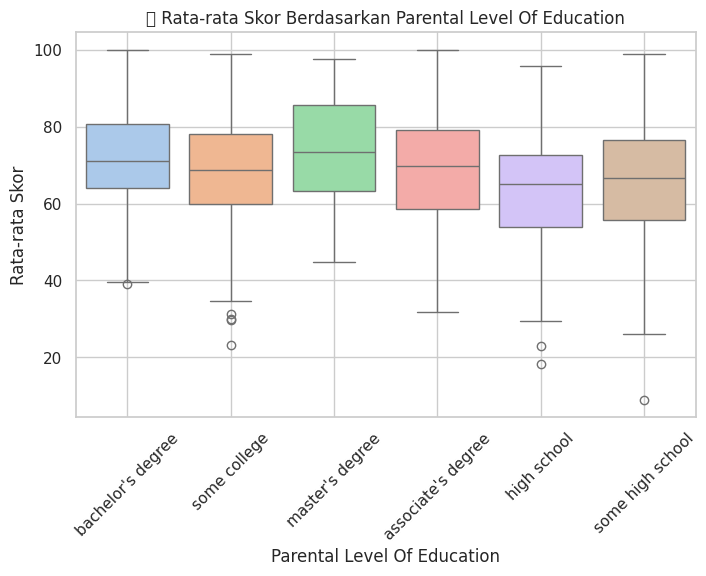

<ipython-input-8-b92172695593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='average_score', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


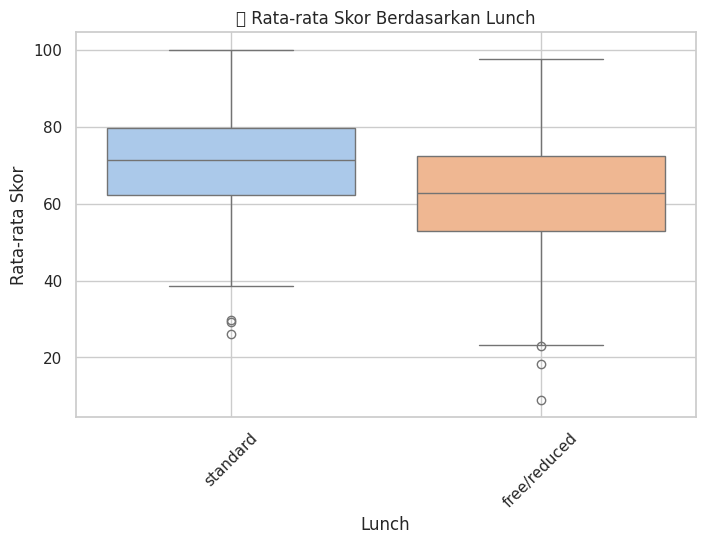

<ipython-input-8-b92172695593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='average_score', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


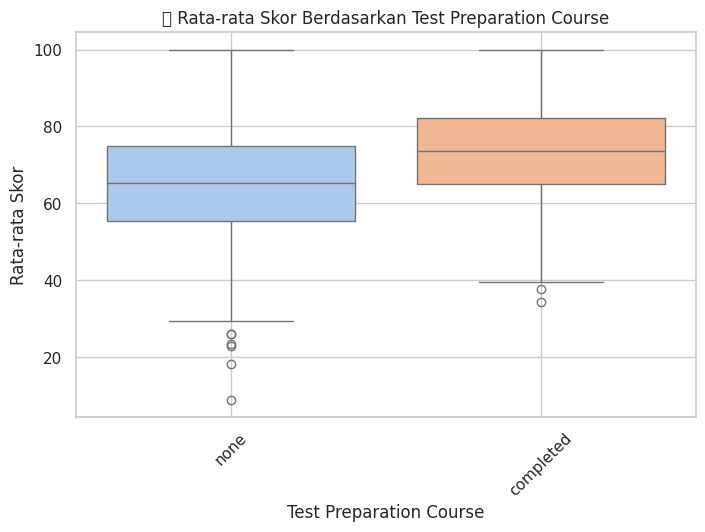

In [8]:
# Perbandingan Rata-rata Skor Berdasarkan Fitur Kategorikal
for feature in cat_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=feature, y='average_score', palette='pastel')
    plt.title(f'📌 Rata-rata Skor Berdasarkan {feature.title()}')
    plt.xticks(rotation=45)
    plt.xlabel(feature.title())
    plt.ylabel('Rata-rata Skor')
    plt.grid(True)
    plt.show()

<ipython-input-9-1cc69a535227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='muted')


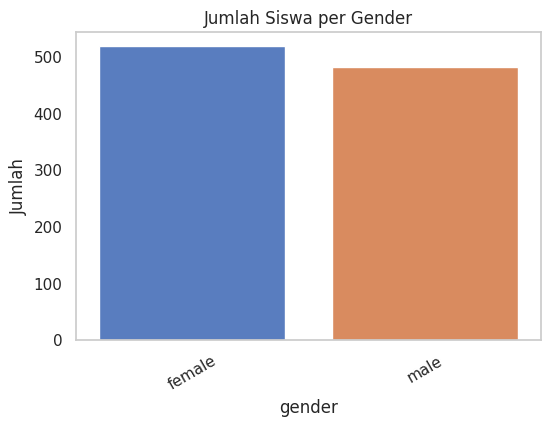

<ipython-input-9-1cc69a535227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='muted')


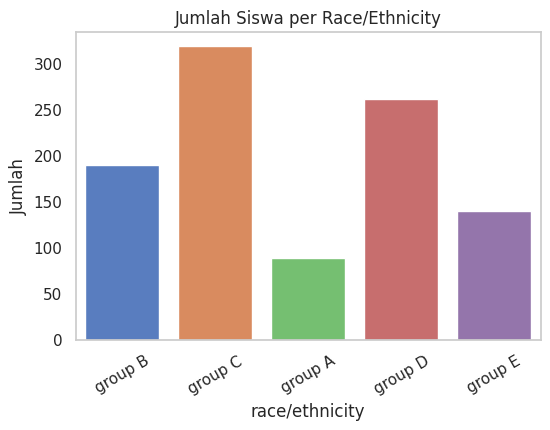

<ipython-input-9-1cc69a535227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='muted')


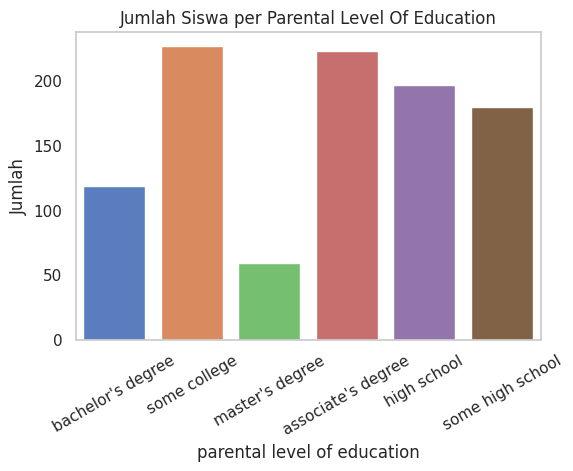

<ipython-input-9-1cc69a535227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='muted')


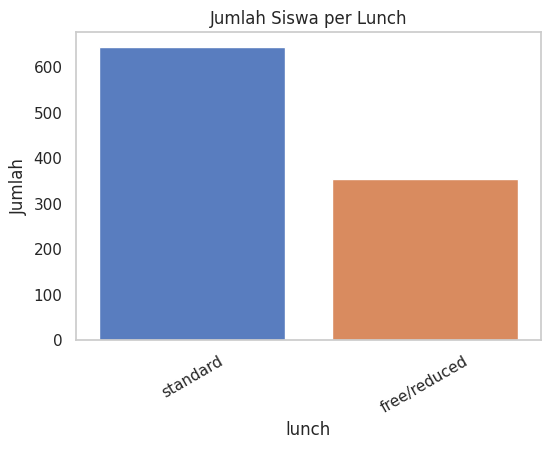

<ipython-input-9-1cc69a535227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='muted')


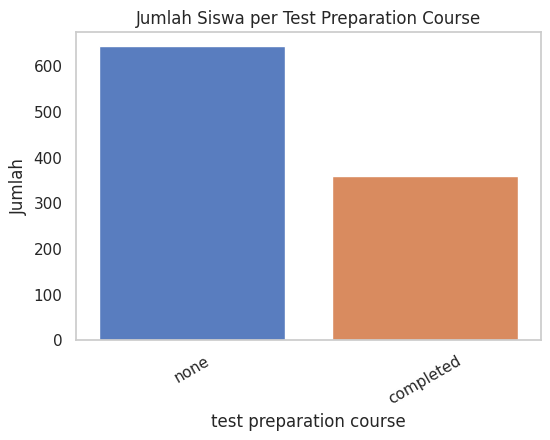

In [9]:
# Countplot Kategori (Distribusi Data Kategorikal)
for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette='muted')
    plt.title(f'Jumlah Siswa per {feature.title()}')
    plt.xticks(rotation=30)
    plt.ylabel('Jumlah')
    plt.grid(axis='y')
    plt.show()

# **Data Preprocessing**

Pada tahap ini dilakukan proses pembersihan dan persiapan data sebelum masuk ke tahap pelatihan model machine learning. Berikut beberapa langkah yang dilakukan:

---

#### 1. ✅ Pengecekan & Penanganan Missing Values dan Duplikat
- Dicek apakah terdapat nilai yang hilang (*missing values*) pada setiap kolom.
- Ditemukan bahwa tidak ada missing values.
- Data duplikat juga dihapus untuk memastikan kualitas data yang lebih baik.

#### 2. 🧹 Deteksi & Penanganan Outlier
- Dilakukan visualisasi menggunakan boxplot untuk mendeteksi outlier pada skor-skor ujian.
- Ditemukan bahwa terdapat nilai `0` pada kolom `math score` yang dianggap tidak realistis.
- Baris dengan nilai tersebut dihapus dari dataset.

#### 3. 🏷️ Pembuatan Label Target dan Fitur Tambahan
- Dibuat kolom baru `average_score` sebagai rata-rata dari tiga nilai ujian: matematika, membaca, dan menulis.
- Berdasarkan `average_score`, dibuat label target `pass`:
  - `1` jika rata-rata skor ≥ 70 (lulus)
  - `0` jika < 70 (tidak lulus)
- Juga dibuat fitur kategorikal `score_level` untuk membagi skor ke dalam kategori: Rendah, Sedang, dan Tinggi.

#### 4. ✂️ Split Data: Training dan Testing
- Dataset dibagi menjadi data pelatihan (80%) dan data pengujian (20%).
- Split dilakukan dengan **stratifikasi berdasarkan label `pass`** agar proporsi kelas tetap seimbang antara train dan test.

#### 5. 🔠 Encoding Fitur Kategorikal
- Dilakukan proses encoding menggunakan `LabelEncoder` untuk mengubah nilai kategorikal menjadi numerik.
- Penting: Encoding hanya di-*fit* pada data training dan kemudian di-*transform* ke data test untuk mencegah data leakage.

#### 6. 📊 Visualisasi Distribusi Target
- Dilakukan visualisasi distribusi label target pada data training untuk memastikan stratifikasi berhasil.

---

Langkah-langkah ini memastikan bahwa data yang digunakan untuk pelatihan dan pengujian model sudah bersih, terstruktur, dan bebas dari kebocoran data (*data leakage*), sehingga model dapat belajar secara optimal dan memberikan hasil evaluasi yang akurat.

## **Pembersihan Awal**

In [10]:
# Cek & Tangani Missing Values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64


In [11]:
# Hapus Data Duplikat
print(f"Jumlah data sebelum hapus duplikat: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Jumlah data setelah hapus duplikat: {df.shape}")

Jumlah data sebelum hapus duplikat: (1000, 9)
Jumlah data setelah hapus duplikat: (1000, 9)


In [12]:
# Deteksi dan tangani outlier (math score = 0 dianggap tidak realistis)
df = df[df['math score'] > 0]

In [13]:
# Buat average_score dan label target pass
num_features = ['math score', 'reading score', 'writing score']
df['average_score'] = df[num_features].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 70 else 0)

# Binning skor ke dalam kategori
df['score_level'] = pd.cut(df['average_score'],
                           bins=[0, 60, 80, 100],
                           labels=['Rendah', 'Sedang', 'Tinggi'])

## **Split Data**

In [14]:
X = df.drop(columns=['average_score', 'pass', 'score_level'])  # fitur
y = df['pass']  # target

# Split dengan stratifikasi agar proporsi kelas seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## **Encoding Fitur Kategorikal**

In [15]:
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()

# Terapkan LabelEncoder hanya di training, lalu transform test
for col in cat_features:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

## **Visualisasi target setelah split**

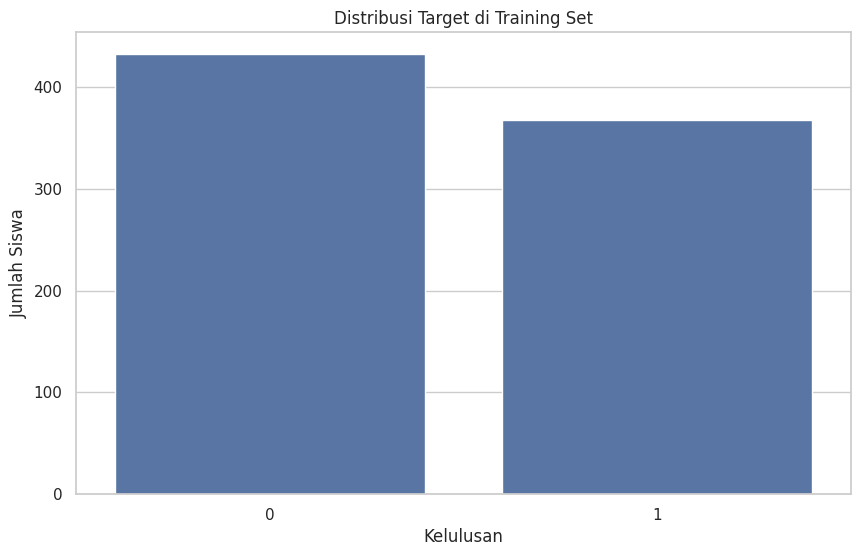

In [16]:
sns.countplot(x=y_train)
plt.title("Distribusi Target di Training Set")
plt.xlabel("Kelulusan")
plt.ylabel("Jumlah Siswa")
plt.show()

# **Model Building**


Pada tahap ini, dilakukan pelatihan model dasar (*baseline*) sebagai langkah awal untuk membandingkan performa model yang lebih kompleks di tahap selanjutnya. Dua model dasar yang digunakan adalah:

1. **Logistic Regression**
2. **Decision Tree Classifier**

---

### 🔧 Langkah-langkah:

1. **Inisialisasi Model**
   - Logistic Regression dan Decision Tree diinisialisasi dengan `random_state=42` agar hasil eksperimen dapat direproduksi.

2. **Pelatihan Model**
   - Kedua model dilatih menggunakan data training (`X_train`, `y_train`).

3. **Prediksi**
   - Setelah pelatihan, model digunakan untuk memprediksi label pada data uji (`X_test`).

4. **Evaluasi Model**
   - Performa model dievaluasi menggunakan:
     - `classification_report`: Menyediakan metrik **precision**, **recall**, **f1-score**, dan **accuracy**.
     - `confusion_matrix`: Menampilkan jumlah prediksi benar dan salah untuk masing-masing kelas (Lulus / Tidak Lulus).

---

### 📈 Hasil Evaluasi:

#### ✅ Logistic Regression
- **Akurasi:** 97%
- **Classification Report:**

  ```
                precision    recall  f1-score   support

             0       0.98      0.96      0.97       108
             1       0.96      0.98      0.97        92

      accuracy                           0.97       200
     macro avg       0.97      0.97      0.97       200
  weighted avg       0.97      0.97      0.97       200
  ```

- **Confusion Matrix:**

  ```
  [[104   4]
   [  2  90]]
  ```

- 📌 **Insight:**
  - Precision & recall untuk kedua kelas sangat tinggi.
  - Hanya 6 kesalahan prediksi dari total 200 data uji:
    - 4 siswa tidak lulus diprediksi lulus
    - 2 siswa lulus diprediksi tidak lulus

---

#### 🌳 Decision Tree Classifier
- **Akurasi:** 96%
- **Classification Report:**

  ```
                precision    recall  f1-score   support

             0       0.97      0.95      0.96       108
             1       0.95      0.97      0.96        92

      accuracy                           0.96       200
     macro avg       0.96      0.96      0.96       200
  weighted avg       0.96      0.96      0.96       200
  ```

- **Confusion Matrix:**

  ```
  [[103   5]
   [  3  89]]
  ```

- 📌 **Insight:**
  - Performa model sangat baik dan sebanding dengan Logistic Regression.
  - Terdapat sedikit lebih banyak kesalahan prediksi dibanding Logistic Regression, namun masih tergolong sangat kecil.

---

### ✅ Kesimpulan:
Model-model ini berfungsi sebagai **baseline**, yang akan menjadi pembanding terhadap model lain yang akan digunakan selanjutnya, seperti model yang dioptimasi dengan **hyperparameter tuning** atau **ensemble methods**.

In [17]:
# Inisialisasi model
logreg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(random_state=42)

In [18]:
# Training model
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=42)

In [19]:
# Prediksi
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)

In [20]:
# Evaluasi Logistic Regression
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.96      0.98      0.97        92

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Confusion Matrix:
[[104   4]
 [  2  90]]


In [21]:
# Evaluasi Decision Tree
print("\n=== Decision Tree Classifier Report ===")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))


=== Decision Tree Classifier Report ===
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.95      0.97      0.96        92

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
[[103   5]
 [  3  89]]


# **Evaluation dan Model Improvement (Hyperparameter Tuning)**

Setelah membangun baseline model, tahap selanjutnya adalah meningkatkan performa model dengan melakukan **hyperparameter tuning** menggunakan teknik **GridSearchCV**. Dua model yang dituning adalah:

1. **Random Forest Classifier**
2. **XGBoost Classifier**

### Evaluasi:
#### Random Forest (Tuned)
- Akurasi: **98%**
- Sangat sedikit kesalahan prediksi.
- Confusion Matrix:
  ```
  [[107   1]
   [  2  90]]
  ```

#### XGBoost (Tuned)
- Akurasi: **98%**
- Sama baiknya dengan Random Forest.
- Confusion Matrix:
  ```
  [[107   1]
   [  3  89]]
  ```

### Kesimpulan:
- Kedua model setelah tuning menunjukkan performa sangat baik.
- Akan dipertimbangkan untuk memilih model akhir berdasarkan kecepatan pelatihan, kompleksitas, dan interpretabilitas.

In [22]:
# GridSearch untuk Random Forest
rf_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_clf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='accuracy', verbose=1)

In [23]:
# Evaluasi Model Random Forest
print("=== Random Forest Classifier Report (Tuned) ===")
rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(X_test)
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

=== Random Forest Classifier Report (Tuned) ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.99      0.98      0.98        92

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Confusion Matrix:
[[107   1]
 [  2  90]]


In [24]:
# GridSearch untuk XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [25]:
# Evaluasi Model XGBoost
print("\n=== XGBoost Classifier Report (Tuned) ===")
xgb_best = xgb_grid.best_estimator_
xgb_preds = xgb_best.predict(X_test)
print(classification_report(y_test, xgb_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))


=== XGBoost Classifier Report (Tuned) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.99      0.97      0.98        92

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix:
[[107   1]
 [  3  89]]
